In [1]:
import os.path
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.modelbuilder.supervised  import SupervisedDataLoader 
from datatools.customtransformers import LogTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline 
np.set_printoptions(precision=4)

pd.set_option('display.width', 200)
pd.set_option('precision', 4)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.4f}'.format
sns.set()
import logging
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
#fhandler = logging.FileHandler(filename='mylog.log', mode='a')
#fhandler.setFormatter(formatter)
#logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)


10-Nov-18 21:09:08 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown
10-Nov-18 21:09:08 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
load_app_config()
DIRECTORY="lendingclub"
TRAIN_FILE  = "Lending_Train.csv"
TEST_FILE  = "Lending_Test.csv"
RESPONSE = "loan_status"
input_path = get_datafolder_path()
train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
supervisedloader = SupervisedDataLoader(train_file=train_file,test_file=test_file,response =RESPONSE) 
train_dataset,test_dataset = supervisedloader.load()
supervisedloader.response


10-Nov-18 21:09:08 - INFO - Adding D:\DataSource to system path
10-Nov-18 21:09:08 - INFO - Adding D:\MachineLearning to system path
10-Nov-18 21:09:08 - INFO - Loading train_file :D:\DataSource\lendingclub\Lending_Train.csv
10-Nov-18 21:09:11 - INFO - Loading test_file :D:\DataSource\lendingclub\Lending_Test.csv


'loan_status'

In [3]:
train_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,...,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,459573,"572,953.0000","25,000.0000","25,000.0000","22,382.6315",36 months,18.78%,913.6300,F,F3,Methodist Healthcare System,9 years,MORTGAGE,"80,000.0000",Not Verified,Nov-09,n,https://lendingclub.com/browse/loanDetail.acti...,572953 added on 11/12/09 > This funds are goi...,small_business,The Greek Tavern,782xx,TX,11.6400,0.0000,Sep-93,700.0000,704.0000,4.0000,54.0000,nan,18.0000,0.0000,"33,761.0000",37.80%,39.0000,f,0.0000,0.0000,"19,182.4300","17,683.5000","8,095.7900","4,679.0700",0.0000,"6,407.5700","1,092.9221",Feb-11,913.6300,Jun-11,Sep-16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,Does not meet the credit policy. Status:Charge...
1,548135,"706,738.0000","3,400.0000","3,400.0000","3,400.0000",36 months,11.49%,112.1100,B,B4,state of new jersey,10+ years,MORTGAGE,"76,145.0000",Not Verified,Jul-10,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,mikes loan,080xx,NJ,14.0600,0.0000,Jan-89,695.0000,699.0000,3.0000,nan,nan,10.0000,0.0000,"10,030.0000",58%,41.0000,f,0.0000,0.0000,"1,232.8600","1,232.8600",828.4200,289.5800,0.0000,114.8600,40.0400,Jun-11,112.1100,NaN,Sep-16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,Charged Off
2,480675,"611,124.0000","10,000.0000","10,000.0000","9,975.0000",36 months,10.25%,323.8500,B,B2,Business Technology Group LLC,2 years,RENT,"39,000.0000",Not Verified,Feb-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 02/08/10 > Debt Consolidat...,debt_consolidation,loan,712xx,LA,20.8600,0.0000,Jun-98,715.0000,719.0000,0.0000,nan,nan,8.0000,0.0000,"9,844.0000",39.10%,12.0000,f,0.0000,0.0000,"11,561.6810","11,532.7800","10,000.0000","1,561.6800",0.0000,0.0000,0.0000,Jun-12,"2,846.1500",NaN,Sep-16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,Fully Paid
3,114943,"113,880.0000","6,000.0000","6,000.0000","5,575.0000",36 months,10.91%,196.1800,C,C3,UWF Parking Services,< 1 year,RENT,"7,000.0000",Not Verified,Aug-07,n,https://lendingclub.com/browse/loanDetail.acti...,I have everything else in my college education...,house,Need to pay for college housing,325xx,FL,8.5700,0.0000,Aug-06,680.0000,

In [4]:
train_dataset['loan_status'].value_counts()

Fully Paid                                             25189
Charged Off                                             4239
Does not meet the credit policy. Status:Fully Paid      1491
Does not meet the credit policy. Status:Charged Off      571
Current                                                  385
In Grace Period                                           12
Late (31-120 days)                                         9
Late (16-30 days)                                          4
Name: loan_status, dtype: int64

In [5]:
test_dataset['loan_status'].value_counts()

Series([], Name: loan_status, dtype: int64)

### Calculate the missing value

In [6]:
from mltools.mlhelper import missing_values
training_missing_values = missing_values(train_dataset)
all_missing  = training_missing_values[training_missing_values['Missing_Values'] ==train_dataset.shape[0]]
print("No of columns that have 100% missing values :{0}".format(all_missing.shape[0]))
all_missing.head()


No of columns that have 100% missing values :54


,Feature,Missing_Values,Percent_of_Total_Values
75,total_cu_tl,31900,100.0000
73,total_rev_hi_lim,31900,100.0000
92,num_accts_ever_120_pd,31900,100.0000
91,mths_since_recent_revol_delinq,31900,100.0000
90,mths_since_recent_inq,31900,100.0000


In [7]:
testing_missing_values = missing_values(test_dataset)
test_missing  = training_missing_values[testing_missing_values['Missing_Values'] ==test_dataset.shape[0]]
print("No of columns that have 100% missing values :{0}".format(test_missing.shape[0]))
test_missing.head()


No of columns that have 100% missing values :54


,Feature,Missing_Values,Percent_of_Total_Values
75,total_cu_tl,31900,100.0000
73,total_rev_hi_lim,31900,100.0000
92,num_accts_ever_120_pd,31900,100.0000
91,mths_since_recent_revol_delinq,31900,100.0000
90,mths_since_recent_inq,31900,100.0000


In [8]:
train_ids = train_dataset['id'].values.tolist()
test_ids = test_dataset['id'].values.tolist()


### Remove features with constant values
##### If feature has single value in all the rows , it has constant value that does not contribute to  prediction , those features needs to be eliminated

In [9]:
train_test = pd.concat([train_dataset,test_dataset],axis =0)

In [10]:
feature_count  = train_test.nunique(dropna=False)

In [11]:
constant_features = pd.DataFrame({'feature':feature_count.index,'count':feature_count.values})
print("constant features :{0},{1}".format(*constant_features.shape))
constant_features[constant_features['count']==1].head()
constant_features[constant_features['count']==1].to_csv("constant_features.csv")

constant features :115,2


In [12]:
remove_constants =constant_features[constant_features['count']==1]['feature'].tolist()
non_constants =constant_features[constant_features['count'] > 1]

In [13]:
print("Before removing constant features :{0}".format(train_test.shape))
train_test.drop(remove_constants,axis =1,inplace=True)
print("After removing constant features :{0}".format(train_test.shape))

Before removing constant features :(42534, 115)
After removing constant features :(42534, 58)


In [14]:
print("Before removing constant features :{0}".format(train_dataset.shape))
train_dataset.drop(remove_constants,axis =1,inplace=True)
print("After removing constant features :{0}".format(train_dataset.shape))

Before removing constant features :(31900, 115)
After removing constant features :(31900, 58)


#### As shown above around 57 features have constant value and these are removed 

In [15]:
train_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,459573,"572,953.0000","25,000.0000","25,000.0000","22,382.6315",36 months,18.78%,913.6300,F,F3,Methodist Healthcare System,9 years,MORTGAGE,"80,000.0000",Not Verified,Nov-09,n,https://lendingclub.com/browse/loanDetail.acti...,572953 added on 11/12/09 > This funds are goi...,small_business,The Greek Tavern,782xx,TX,11.6400,0.0000,Sep-93,700.0000,704.0000,4.0000,54.0000,nan,18.0000,0.0000,"33,761.0000",37.80%,39.0000,0.0000,0.0000,"19,182.4300","17,683.5000","8,095.7900","4,679.0700",0.0000,"6,407.5700","1,092.9221",Feb-11,913.6300,Jun-11,Sep-16,659.0000,655.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Does not meet the credit policy. Status:Charge...
1,548135,"706,738.0000","3,400.0000","3,400.0000","3,400.0000",36 months,11.49%,112.1100,B,B4,state of new jersey,10+ years,MORTGAGE,"76,145.0000",Not Verified,Jul-10,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,mikes loan,080xx,NJ,14.0600,0.0000,Jan-89,695.0000,699.0000,3.0000,nan,nan,10.0000,0.0000,"10,030.0000",58%,41.0000,0.0000,0.0000,"1,232.8600","1,232.8600",828.4200,289.5800,0.0000,114.8600,40.0400,Jun-11,112.1100,NaN,Sep-16,649.0000,645.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Charged Off
2,480675,"611,124.0000","10,000.0000","10,000.0000","9,975.0000",36 months,10.25%,323.8500,B,B2,Business Technology Group LLC,2 years,RENT,"39,000.0000",Not Verified,Feb-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 02/08/10 > Debt Consolidat...,debt_consolidation,loan,712xx,LA,20.8600,0.0000,Jun-98,715.0000,719.0000,0.0000,nan,nan,8.0000,0.0000,"9,844.0000",39.10%,12.0000,0.0000,0.0000,"11,561.6810","11,532.7800","10,000.0000","1,561.6800",0.0000,0.0000,0.0000,Jun-12,"2,846.1500",NaN,Sep-16,764.0000,760.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Fully Paid
3,114943,"113,880.0000","6,000.0000","6,000.0000","5,575.0000",36 months,10.91%,196.1800,C,C3,UWF Parking Services,< 1 year,RENT,"7,000.0000",Not Verified,Aug-07,n,https://lendingclub.com/browse/loanDetail.acti...,I have everything else in my college education...,house,Need to pay for college housing,325xx,FL,8.5700,0.0000,Aug-06,680.0000,684.0000,2.0000,0.0000,0.0000,1.0000,0.0000,0.0000,NaN,2.0000,0.0000,0.0000,"4,444.4100","4,129.9000","3,419.4500",893.7700,14.9894,116.2000,1.2100,Jun-09,196.1800,Dec-09,Sep-16,684.0000,680.0000,nan,0.0000,nan,0.0000,nan,0.0000,Does not meet the credit policy. Status:Charge...
4,668278,"854,440.0000","8,000.0000","8,000.0000","8,000.0000",36 months,13.06%,269.7900,C,C2,Evergreen Packaging,4 years,MORTGAGE,"42,500.0000",Source Verified,Feb-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Freedom Plan,441xx,OH,10.6700,3.0000,Nov-69,670.0000,674.0000,0.0000,6.0000,98.0000,14.0000,1.0000,"11,251.0000",50%,25.0000,0.0000,0.0000,"9,712.1279","9,712.1300","8,000.0000","1,712.1300",0.0000,0.0000,0.0000,Mar-14,286.3900,NaN,Sep-16,654.0000,650.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,Fully Paid


In [16]:
non_constants['count_percent'] = non_constants['count']/train_test.shape[0]
non_constants[non_constants['count_percent'] > 0.8 ]

,feature,count,count_percent
0,id,42534,1.0000
1,member_id,42534,1.0000
17,url,42534,1.0000
39,total_pymnt,40669,0.9562
40,total_pymnt_inv,40107,0.9429
42,total_rec_int,37532,0.8824
47,last_pymnt_amnt,37116,0.8726


In [17]:
member_count= train_test['member_id'].value_counts() 
member_count = pd.DataFrame({'member_id':member_count.index,'count':member_count.values})
member_count[member_count['count'] >1]

,member_id,count


In [18]:
member_id_count = train_test.groupby(['id'],as_index=False)['member_id'].count()
member_id_count.rename(columns={'member_id':'count'},inplace =True)
member_id_count[member_id_count['count']>1]

,id,count


In [19]:
#train_test[train_test['id'].isin(train_ids)].to_csv('lendingclub_58_train.csv', index=False)

In [20]:
#train_test[train_test['id'].isin(test_ids)].to_csv('lendingclub_58_test.csv', index=False)

### Check the datatype distribution

In [21]:
categorical_columns = train_test.select_dtypes('object') 
categorical_columns.head(10)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,loan_status
0,36 months,18.78%,F,F3,Methodist Healthcare System,9 years,MORTGAGE,Not Verified,Nov-09,n,https://lendingclub.com/browse/loanDetail.acti...,572953 added on 11/12/09 > This funds are goi...,small_business,The Greek Tavern,782xx,TX,Sep-93,37.80%,Feb-11,Jun-11,Sep-16,Does not meet the credit policy. Status:Charge...
1,36 months,11.49%,B,B4,state of new jersey,10+ years,MORTGAGE,Not Verified,Jul-10,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,mikes loan,080xx,NJ,Jan-89,58%,Jun-11,NaN,Sep-16,Charged Off
2,36 months,10.25%,B,B2,Business Technology Group LLC,2 years,RENT,Not Verified,Feb-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 02/08/10 > Debt Consolidat...,debt_consolidation,loan,712xx,LA,Jun-98,39.10%,Jun-12,NaN,Sep-16,Fully Paid
3,36 months,10.91%,C,C3,UWF Parking Services,< 1 year,RENT,Not Verified,Aug-07,n,https://lendingclub.com/browse/loanDetail.acti...,I have everything else in my college education...,house,Need to pay for college housing,325xx,FL,Aug-06,NaN,Jun-09,Dec-09,Sep-16,Does not meet the credit policy. Status:Charge...
4,36 months,13.06%,C,C2,Evergreen Packaging,4 years,MORTGAGE,Source Verified,Feb-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Freedom Plan,441xx,OH,Nov-69,50%,Mar-14,NaN,Sep-16,Fully Paid
5,36 months,8.49%,A,A5,Sony Electronics,6 years,RENT,Not Verified,Jul-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 07/20/11 > Looking to cons...,debt_consolidation,Debt Consolidation,070xx,NJ,Dec-03,38.60%,Sep-12,NaN,Aug-12,Fully Paid
6,36 months,14.72%,C,C5,Louisiana State Resedential life,10+ years,MORTGAGE,Verified,Jun-10,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/16/10 > I HAVE A LOUISI...,major_purchase,1998 BMW 3 series,708xx,LA,Jun-00,13%,Aug-12,NaN,Jul-12,Fully Paid
7,60 months,15.28%,D,D3,Department of Juvenile Justice,10+ years,MORTGAGE,Not Verified,Mar-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/28/11 > I have worked f...,debt_consolidation,Consolidation,402xx,KY,Dec-92,59.80%,Dec-14,NaN,Dec-14,Fully Paid
8,60 months,18.25%,D,D5,horry county public schools,7 years,MORTGAGE,Source Verified,Nov-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,credit debt,295xx,SC,Dec-97,56%,Nov-12,NaN,Sep-16,Fully Paid
9,60 months,15.99%,D,D2,Golden 1 Credit Union,8 years,RENT,Source Verified,Jul-11,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,vet expenses and some consolidation,957xx,CA,Oct-03,28.60%,Aug-15,NaN,Sep-16,Charged Off


In [22]:
train_test['member_id'] =train_test['member_id'].astype(int)
 

In [23]:
float_ds = train_test.select_dtypes('float')
float_columns = float_ds.columns.values.tolist()


In [24]:
train_dataset =train_test[train_test['id'].isin(train_ids)]
train_dataset.shape

(31900, 58)

10-Nov-18 21:09:20 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Arial ('c:\\windows\\fonts\\arial.ttf') with score of 0.050000
10-Nov-18 21:09:29 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to Arial ('c:\\windows\\fonts\\arial.ttf') with score of 0.050000


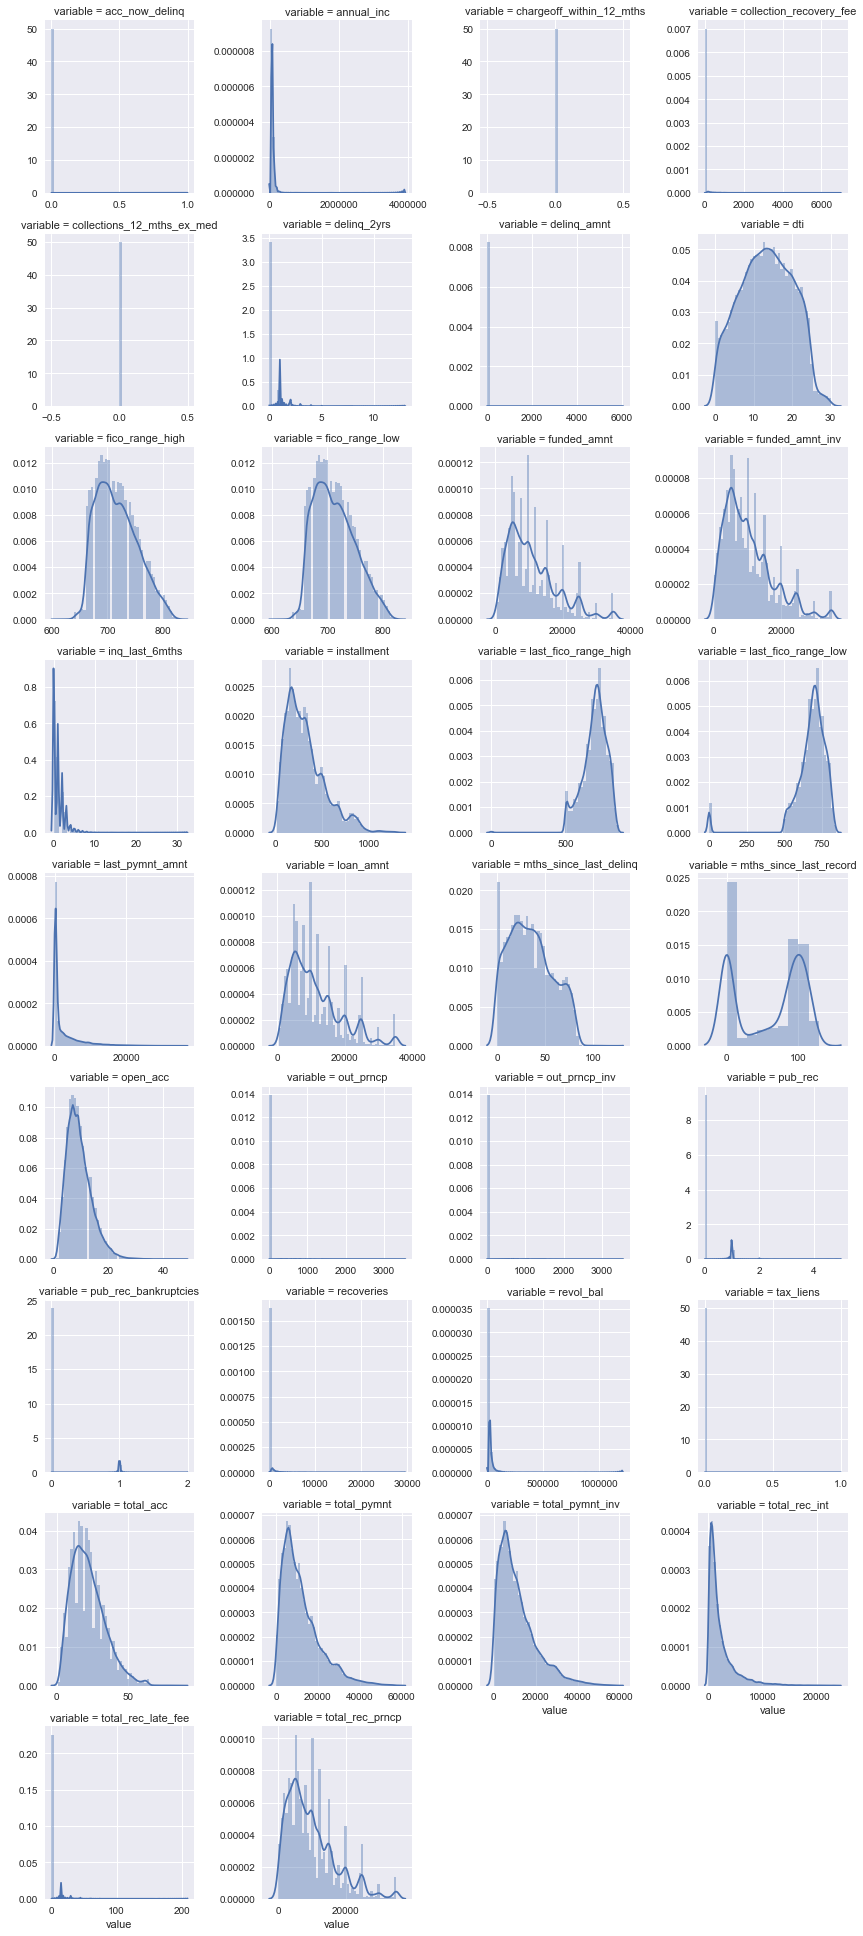

In [25]:
f = pd.melt(train_dataset, value_vars=sorted(float_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [26]:
train_dataset['acc_now_delinq'].value_counts()

0.0000    31878
1.0000        4
Name: acc_now_delinq, dtype: int64

In [27]:
train_dataset[train_dataset['annual_inc'].isnull()]
 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
2837,79893,79878,"6,700.0000","6,700.0000","6,700.0000",36 months,7.75%,209.1800,A,A3,NaN,< 1 year,NONE,nan,Not Verified,Jul-07,n,https://lendingclub.com/browse/loanDetail.acti...,I am moving to Florida and would like to borro...,other,Moving expenses and security deposit,100xx,NY,1.0000,nan,NaN,800.0000,804.0000,nan,nan,nan,nan,nan,0.0000,NaN,nan,0.0000,0.0000,"7,530.4814","7,530.4800","6,700.0000",830.4800,0.0000,0.0000,0.0000,Jul-10,209.8900,Aug-10,May-07,804.0000,800.0000,nan,nan,nan,nan,nan,nan,Does not meet the credit policy. Status:Fully ...


In [28]:
print("Null values for column")
print("----------------------")
null_columns= []
for column in train_dataset.columns.values:
    if train_dataset[train_dataset[column].isnull()].shape[0]:
        null_columns.append(column)
        print("{0}:{1}".format(column,train_dataset[train_dataset[column].isnull()].shape[0]))


Null values for column
----------------------
emp_title:1954
emp_length:829
annual_inc:1
desc:9971
title:10
delinq_2yrs:18
earliest_cr_line:18
inq_last_6mths:18
mths_since_last_delinq:20242
mths_since_last_record:29170
open_acc:18
pub_rec:18
revol_util:69
total_acc:18
last_pymnt_d:59
next_pymnt_d:29428
last_credit_pull_d:3
collections_12_mths_ex_med:112
acc_now_delinq:18
chargeoff_within_12_mths:112
delinq_amnt:18
pub_rec_bankruptcies:1017
tax_liens:80


In [29]:
float_describe= {}
for column in float_columns:
    column_describe = train_dataset[column].describe()
    float_describe[column] = column_describe.ravel().tolist()
float_describe= pd.DataFrame(float_describe)
float_describe=float_describe.T 
float_describe.columns  = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
float_describe

,count,mean,std,min,25%,50%,75%,max
loan_amnt,"31,900.0000","11,103.7837","7,436.0228",500.0000,"5,118.7500","9,700.0000","15,000.0000","35,000.0000"
funded_amnt,"31,900.0000","10,835.7876","7,170.7204",500.0000,"5,000.0000","9,600.0000","15,000.0000","35,000.0000"
funded_amnt_inv,"31,900.0000","10,153.7875","7,155.2653",0.0000,"4,950.0000","8,500.0000","14,042.9741","35,000.0000"
installment,"31,900.0000",322.8360,209.2540,15.6700,165.7400,277.8200,429.3125,"1,305.1900"
annual_inc,"31,899.0000","69,144.7898","59,336.7538","1,896.0000","40,000.0000","59,000.0000","82,655.3000","3,900,000.0000"
dti,"31,900.0000",13.3588,6.7337,0.0000,8.2000,13.4000,18.6800,29.9900
delinq_2yrs,"31,882.0000",0.1528,0.5147,0.0000,0.0000,0.0000,0.0000,13.0000
fico_range_low,"31,900.0000",713.1122,36.2392,610.0000,685.0000,710.0000,740.0000,825.0000
fico_range_high,"31,900.0000",717.1122,36.2392,614.0000,689.0000,714.0000,744.0000,829.0000
inq_last_6mths,"31,882.0000",1.0785,1.4976,0.0000,0.0000,1.0000,2.0000,32.0000


In [30]:
float_to_be_removed = float_describe[ ( float_describe['min']==0) & (float_describe['max']==0) ]

In [31]:
float_to_be_removed = float_to_be_removed.index.tolist()
float_to_be_removed

['collections_12_mths_ex_med', 'chargeoff_within_12_mths']

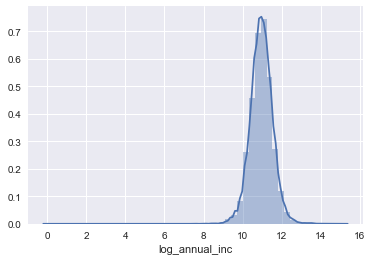

In [32]:
train_dataset['log_annual_inc'] = np.log(train_dataset['annual_inc'].fillna(1))
ax = sns.distplot(train_dataset['log_annual_inc'])